In [1]:
import pandas as pd

df = pd.read_csv("ENGRO_PSX_2021_2024.csv")
df.head()


,Date,Open,High,Low,Close,Volume
0,2021-01-01,308.45,321.00,307.25,312.58,649583
1,2021-01-04,312.87,315.29,309.00,309.90,326474
2,2021-01-05,311.44,311.44,307.77,308.58,426937
3,2021-01-06,309.95,312.74,308.50,312.09,521872
4,2021-01-07,313.49,316.50,311.15,315.85,787143


In [2]:
# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Set date as index
df.set_index('Date', inplace=True)

# Keep only needed columns
df = df[['Open', 'High', 'Low', 'Close']]
df.head()


,Open,High,Low,Close
Date,,,,
2021-01-01,308.45,321.00,307.25,312.58
2021-01-04,312.87,315.29,309.00,309.90
2021-01-05,311.44,311.44,307.77,308.58
2021-01-06,309.95,312.74,308.50,312.09
2021-01-07,313.49,316.50,311.15,315.85


In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.update_layout(
    title='ENGRO Candlestick Chart (2021–2024)',
    xaxis_title='Date',
    yaxis_title='Price (PKR)',
    xaxis_rangeslider_visible=False
)

fig.show()


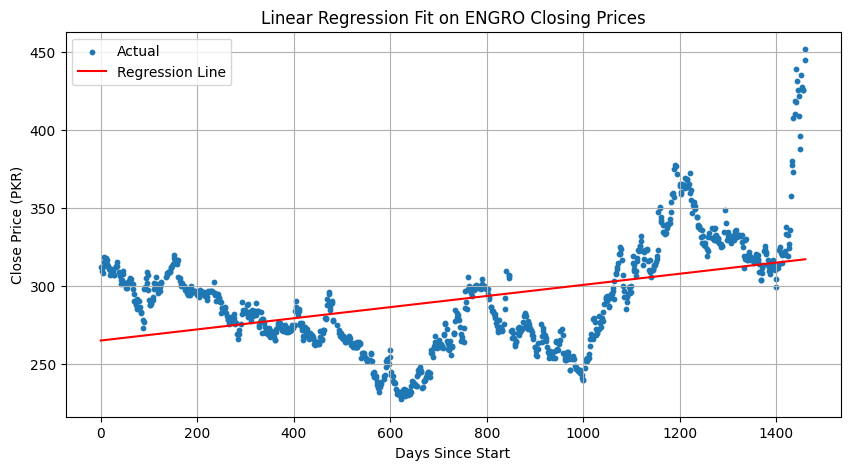

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Reset index to access 'Date' as a column
df_reset = df.reset_index()

# Create a numerical feature from date (days since start)
df_reset['Days'] = (df_reset['Date'] - df_reset['Date'].min()).dt.days
X = df_reset[['Days']]
y = df_reset['Close']

# Train/test split (we'll use full data for prediction only)
model = LinearRegression()
model.fit(X, y)

# Plot model fit
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=10, label='Actual')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression Fit on ENGRO Closing Prices')
plt.xlabel('Days Since Start')
plt.ylabel('Close Price (PKR)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from datetime import datetime
import warnings

# Ignore all UserWarnings from any library
warnings.filterwarnings("ignore", category=UserWarning)

# Helper to convert future date to "days since start"
start_date = df_reset['Date'].min()

future_dates = {
    '2025-09-01': (datetime(2025, 9, 1) - start_date).days,
    '2025-12-01': (datetime(2025, 12, 1) - start_date).days,
    '2026-06-01': (datetime(2026, 6, 1) - start_date).days
}

# Predict each future date
predictions = {}
for date, day in future_dates.items():
    pred_price = model.predict(np.array([[day]]))[0]
    predictions[date] = round(pred_price, 2)

print("📈 Predicted Closing Prices:")
for date, price in predictions.items():
    print(f"- {date}: {price} PKR")




📈 Predicted Closing Prices:
- 2025-09-01: 326.02 PKR
- 2025-12-01: 329.27 PKR
- 2026-06-01: 335.76 PKR


In [6]:
investment_date = datetime(2025, 6, 1)
days_invest = (investment_date - start_date).days
buy_price = model.predict(np.array([[days_invest]]))[0]

investment = 10000
shares_bought = investment / buy_price

print(f"💰 On 1st June 2025, you buy at {buy_price:.2f} PKR/share → {shares_bought:.2f} shares")

# Forecast value at each future date
for date, future_price in predictions.items():
    future_value = shares_bought * future_price
    profit = future_value - investment
    print(f"📅 {date} → Portfolio Value: {future_value:.2f} PKR | Profit: {profit:.2f} PKR")


💰 On 1st June 2025, you buy at 322.74 PKR/share → 30.98 shares
📅 2025-09-01 → Portfolio Value: 10101.64 PKR | Profit: 101.64 PKR
📅 2025-12-01 → Portfolio Value: 10202.34 PKR | Profit: 202.34 PKR
📅 2026-06-01 → Portfolio Value: 10403.43 PKR | Profit: 403.43 PKR
